# Applied Data Science Capstone
In this workbook, I would use this workbook to complete the course.

In [1]:
import pandas as pd
import numpy as np

print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Segmenting and Clustering Neighborhoods in Toronto
Week 3 Assignment - Analyze Toronto by Location

Starting the analysis, first to import relevant libraries, i.e. BeautifulSoup(to scrape data from html), pandas(essential for data frame), request(to call url). Then, load data into notebook and start our journey!

In [2]:
# import Library
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
#import data with url
wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text, "html.parser")

After importing, we need to clean up the data before we could analyze. Example of data cleaning, eliminate some characters like '\n', drop missing values, and so on.

In [4]:
#Extract table
toronto_table = soup.find_all("table")
table = toronto_table[0]

#Extract and cleaning
data = [[cell.text.strip("\n") for cell in row.find_all(["th", "td"])] for row in table.find_all("tr")]
df = pd.DataFrame(data)
df.columns = ['Postal Code', 'Borough', 'Neighbourhood']
df.drop(df.index[0], inplace = True)
df.drop(df[df['Borough'] == "Not assigned"].index, inplace = True)
df

,Postal Code,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
10,M1B,Scarborough,"Malvern, Rouge"
12,M3B,North York,Don Mills
13,M4B,East York,"Parkview Hill, Woodbine Gardens"
14,M5B,Downtown Toronto,"Garden District, Ryerson"


In [5]:
df.shape

(103, 3)

For better result, i decided to merge the given location data with the cleaned data. 

In [6]:
#Merge Latitude and Longitude with Postal Code
df2 = pd.read_csv("http://cocl.us/Geospatial_data")
merged = pd.merge(left = df, right = df2, left_on = 'Postal Code', right_on = 'Postal Code')
merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


Understand that it's crucial to have map visualization for consequence steps, I import folium to show my result.

In [7]:
#Visualize Data in Map
!pip install folium==0.5.0
import folium

     |████████████████████████████████| 81kB 46kB/s eta 0:00:0101
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium


To observe the data distribution, map is created.

In [8]:
# create map and display it
toronto_map = folium.Map(location=[43.651070, -79.347015], zoom_start=12)

borough = folium.map.FeatureGroup()

# loop through location
for lat, lng, in zip(merged.Latitude, merged.Longitude):
    borough.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow', #color by cluster
            fill=True,
            fill_color='blue', #colour by cluster
            fill_opacity=0.6
        )
    )

# add into map
toronto_map.add_child(borough)

We manipulate the sklearn library to perform k-mean clustering.

In [9]:
#find the best clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

As suggested, Borough doesn't contain Toronto will be excluded in the analysis. Hence, merged 3 is created for K-means clustering.

In [37]:
#filter with Toronto only
merged2 = merged[merged['Borough'].str.contains("Toronto") == True]
merged3 = merged2.drop(merged2[['Postal Code', 'Borough', 'Neighbourhood']],axis = 1)
merged3

,Latitude,Longitude
2,43.654260,-79.360636
4,43.662301,-79.389494
9,43.657162,-79.378937
15,43.651494,-79.375418
19,43.676357,-79.293031
20,43.644771,-79.373306
24,43.657952,-79.387383
25,43.669542,-79.422564
30,43.650571,-79.384568
31,43.669005,-79.442259


For better result, elbow method had been used to find the best no of cluster. From the graph, clusters = 4 seems to be the best.

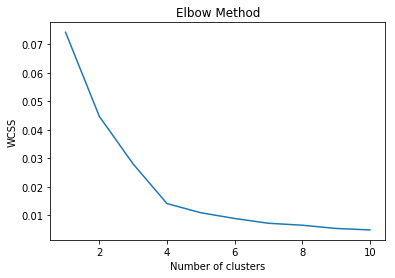

In [38]:
#determine the best cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(merged3[['Latitude', 'Longitude']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kcluster = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(merged3)
kmeans.labels_[0:10]

array([1, 1, 1, 1, 3, 1, 1, 2, 1, 2], dtype=int32)

Insert cluster label into table.

In [40]:
merged2.insert(0, 'Cluster Labels', kmeans.labels_)
merged2

,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,1,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,1,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,3,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,1,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,1,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,2,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,1,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,2,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


Observe the result by map.

In [42]:
#visualize cluster on Map
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[43.651070, -79.347015], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged2['Latitude'], merged2['Longitude'], merged2['Borough'], merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters